import packages


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import time

connect to drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def show(img):
    plt.imshow(img)
    plt.show()

In [ ]:
#connected components algorithm
def imshow_components(labels):
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    show(labeled_img)
    

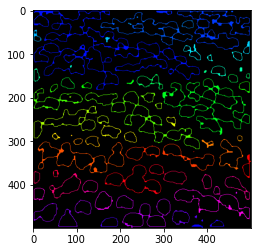

No of Lemons Present In The Image :   77
Time Taken  0.6160469055175781


In [ ]:
fp = "/content/drive/My Drive/lemons/image-data/lemon2.jpg"

def segment_count(fp):
    #Read image
    img = cv2.imread(fp)
    #convert image from rgb to hsv color model
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # split color ranges
    h, s, v = cv2.split(hsv)
    #get binary image
    _, thr = cv2.threshold(v, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #Noice removal
    blur = cv2.GaussianBlur(thr,(3,3),5)
    #finding contours
    contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    thr=cv2.drawContours(thr, contours, -1, (0,0,255), 3)
    # canny edge detection
    edges = cv2.Canny(thr,100,200)
    kernel = np.ones((5,5),np.uint8)
    #Morphological operations to remove noice
    closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    num_labels, labels_im = cv2.connectedComponents(closing)   
    imshow_components(labels_im)
    print('No of Lemons Present In The Image :  ',num_labels)
s = time.time()    
segment_count(fp)    
e = time.time()
print('Time Taken ',e-s)

**Reference**

[ieee paper](https://sci-hub.tw/https://ieeexplore.ieee.org/document/8455137)

https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html

https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
